# Assessment of Learning - Text Mining
<hr>
Anggota:<br>
- Elvano Jethro Mogi Pardede - 2502025403<br>
- Rasyad Muhammad Ramdhanazuri - 2501992305<br>
- Theophilus Nathan Tanudjaja - 2502007514<br>
- Wicakra Hanly Tanudjaja - 2502032964<br>

# Data Preprocessing

### Install Libraries

In [1]:
!pip install kaggle PySastrawi nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 3.1 MB/s eta 0:00:00


In [2]:
!pip install transformers==4.37.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 5.1 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.41.2
    Uninstalling transformers-4.41.2:
      Successfully uninstalled transformers-4.41.2


### Import Libraries

In [3]:
import pandas as pd
import json
import re
import html
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

### Create a Kaggle API

In [4]:
key = '{"username":"******","key":"**********************"}'

with open('kaggle.json', 'w') as file:
  json.dump(key, file)

### Permission setting

In [5]:
!chmod 600 ./kaggle.json

### Download dataset

In [6]:
!kaggle datasets download gevabriel/indonesian-sms-spam

Dataset URL: https://www.kaggle.com/datasets/gevabriel/indonesian-sms-spam
License(s): CC0-1.0
  0% 0.00/58.6k [00:00<?, ?B/s]
100% 58.6k/58.6k [00:00<00:00, 59.9MB/s]


### Unzip dataset file

In [7]:
!unzip -o indonesian-sms-spam.zip

Archive:  indonesian-sms-spam.zip
  inflating: sms_spam_indo.csv       


### Import dataset into pandas

In [8]:
df = pd.read_csv('./sms_spam_indo.csv')
df

,Kategori,Pesan
0,spam,Plg Yth: Simcard anda mendptkan bonus poin plu...
1,ham,Iya ih ko sedih sih gtau kapan lg ke bandung :(
2,ham,Kalau mau bikin model/controller mending per a...
3,ham,Selamat nama1. Semoga selalu menempuh hidup ya...
4,spam,Tingkatkan nilai isi ulang Anda selanjutnya mi...
...,...,...
1138,ham,Yg ragu sm bulet/datar atau yg pgn ikutan deba...
1139,ham,"Semangat yang ibu gita, ibu putri dan bapak ad..."
1140,ham,"nama1, minta database kamu sama view dan contr..."
1141,spam,Dapatkan GRATIS 1 cappuccino (hot/ice) & Freza...


### Category Mapping

In [9]:
CATEGORY = {"ham": 0, "spam": 1}

df['Kategori'] = df['Kategori'].map(CATEGORY)

### Case Folding

In [10]:
df["Pesan_clean"] = df["Pesan"].apply(lambda x: x.lower())
df

,Kategori,Pesan,Pesan_clean
0,1,Plg Yth: Simcard anda mendptkan bonus poin plu...,plg yth: simcard anda mendptkan bonus poin plu...
1,0,Iya ih ko sedih sih gtau kapan lg ke bandung :(,iya ih ko sedih sih gtau kapan lg ke bandung :(
2,0,Kalau mau bikin model/controller mending per a...,kalau mau bikin model/controller mending per a...
3,0,Selamat nama1. Semoga selalu menempuh hidup ya...,selamat nama1. semoga selalu menempuh hidup ya...
4,1,Tingkatkan nilai isi ulang Anda selanjutnya mi...,tingkatkan nilai isi ulang anda selanjutnya mi...
...,...,...,...
1138,0,Yg ragu sm bulet/datar atau yg pgn ikutan deba...,yg ragu sm bulet/datar atau yg pgn ikutan deba...
1139,0,"Semangat yang ibu gita, ibu putri dan bapak ad...","semangat yang ibu gita, ibu putri dan bapak ad..."
1140,0,"nama1, minta database kamu sama view dan contr...","nama1, minta database kamu sama view dan contr..."
1141,1,Dapatkan GRATIS 1 cappuccino (hot/ice) & Freza...,dapatkan gratis 1 cappuccino (hot/ice) & freza...


### Noise removal

In [11]:
def clean(text):
    # Convert HTML escapes to character
    text = html.unescape(text)
    # Remove HTML tags
    text = re.sub(r'<[^<>]*>', ' ', text)
    # Remove links
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)
    # Remove text in []
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)
    # Remove triple duplicates of characters
    text = re.sub(r'([a-zA-Z])\1\1','\\1', text)
    # Remove numbers
    text = re.sub(r'[0-9]+','', text)
    # Remove symbols
    text = re.sub(r'[!$%^&*@#()_+|~=`{}\[\]%\-:";\'<>?,.\/]', ' ', text)
    # Remove line breaks
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)
    # Remove multiple spaces
    text = re.sub(' +', ' ', text)
    return text.strip()

In [12]:
df["Pesan_clean"] = df["Pesan_clean"].apply(clean)
df

,Kategori,Pesan,Pesan_clean
0,1,Plg Yth: Simcard anda mendptkan bonus poin plu...,plg yth simcard anda mendptkan bonus poin plus...
1,0,Iya ih ko sedih sih gtau kapan lg ke bandung :(,iya ih ko sedih sih gtau kapan lg ke bandung
2,0,Kalau mau bikin model/controller mending per a...,kalau mau bikin model controller mending per a...
3,0,Selamat nama1. Semoga selalu menempuh hidup ya...,selamat nama semoga selalu menempuh hidup yang...
4,1,Tingkatkan nilai isi ulang Anda selanjutnya mi...,tingkatkan nilai isi ulang anda selanjutnya mi...
...,...,...,...
1138,0,Yg ragu sm bulet/datar atau yg pgn ikutan deba...,yg ragu sm bulet datar atau yg pgn ikutan deba...
1139,0,"Semangat yang ibu gita, ibu putri dan bapak ad...",semangat yang ibu gita ibu putri dan bapak adi...
1140,0,"nama1, minta database kamu sama view dan contr...",nama minta database kamu sama view dan control...
1141,1,Dapatkan GRATIS 1 cappuccino (hot/ice) & Freza...,dapatkan gratis cappuccino hot ice freza setia...


### Stemming

In [13]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

df["Pesan_clean"] = df["Pesan_clean"].apply(stemmer.stem)
df

,Kategori,Pesan,Pesan_clean
0,1,Plg Yth: Simcard anda mendptkan bonus poin plu...,plg yth simcard anda mendptkan bonus poin plus...
1,0,Iya ih ko sedih sih gtau kapan lg ke bandung :(,iya ih ko sedih sih gtau kapan lg ke bandung
2,0,Kalau mau bikin model/controller mending per a...,kalau mau bikin model controller mending per a...
3,0,Selamat nama1. Semoga selalu menempuh hidup ya...,selamat nama moga selalu tempuh hidup yang bah...
4,1,Tingkatkan nilai isi ulang Anda selanjutnya mi...,tingkat nilai isi ulang anda lanjut minimal rp...
...,...,...,...
1138,0,Yg ragu sm bulet/datar atau yg pgn ikutan deba...,yg ragu sm bulet datar atau yg pgn ikut debat ...
1139,0,"Semangat yang ibu gita, ibu putri dan bapak ad...",semangat yang ibu gita ibu putri dan bapak adi...
1140,0,"nama1, minta database kamu sama view dan contr...",nama minta database kamu sama view dan control...
1141,1,Dapatkan GRATIS 1 cappuccino (hot/ice) & Freza...,dapat gratis cappuccino hot ice freza tiap tra...


### Tokenizing

In [14]:
nltk.download('punkt')
df["Pesan_clean"] = df["Pesan_clean"].apply(word_tokenize)
df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Kategori,Pesan,Pesan_clean
0,1,Plg Yth: Simcard anda mendptkan bonus poin plu...,"[plg, yth, simcard, anda, mendptkan, bonus, po..."
1,0,Iya ih ko sedih sih gtau kapan lg ke bandung :(,"[iya, ih, ko, sedih, sih, gtau, kapan, lg, ke,..."
2,0,Kalau mau bikin model/controller mending per a...,"[kalau, mau, bikin, model, controller, mending..."
3,0,Selamat nama1. Semoga selalu menempuh hidup ya...,"[selamat, nama, moga, selalu, tempuh, hidup, y..."
4,1,Tingkatkan nilai isi ulang Anda selanjutnya mi...,"[tingkat, nilai, isi, ulang, anda, lanjut, min..."
...,...,...,...
1138,0,Yg ragu sm bulet/datar atau yg pgn ikutan deba...,"[yg, ragu, sm, bulet, datar, atau, yg, pgn, ik..."
1139,0,"Semangat yang ibu gita, ibu putri dan bapak ad...","[semangat, yang, ibu, gita, ibu, putri, dan, b..."
1140,0,"nama1, minta database kamu sama view dan contr...","[nama, minta, database, kamu, sama, view, dan,..."
1141,1,Dapatkan GRATIS 1 cappuccino (hot/ice) & Freza...,"[dapat, gratis, cappuccino, hot, ice, freza, t..."


### Function to remove stopwords

In [15]:
def remove_stopword(tokens: list, stopwords: set):
    filtered_words = [word for word in tokens if not word in stopwords]
    return filtered_words

### Removing Indonesian stopwords

In [16]:
nltk.download('stopwords')
stop_words = set(stopwords.words("indonesian"))

df["Pesan_clean"] = df["Pesan_clean"].apply(lambda x: remove_stopword(x, stopwords=stop_words))
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Kategori,Pesan,Pesan_clean
0,1,Plg Yth: Simcard anda mendptkan bonus poin plu...,"[plg, yth, simcard, mendptkan, bonus, poin, pl..."
1,0,Iya ih ko sedih sih gtau kapan lg ke bandung :(,"[iya, ih, ko, sedih, sih, gtau, lg, bandung]"
2,0,Kalau mau bikin model/controller mending per a...,"[bikin, model, controller, mending, y]"
3,0,Selamat nama1. Semoga selalu menempuh hidup ya...,"[selamat, nama, moga, tempuh, hidup, bahagia, ..."
4,1,Tingkatkan nilai isi ulang Anda selanjutnya mi...,"[tingkat, nilai, isi, ulang, minimal, rpribu, ..."
...,...,...,...
1138,0,Yg ragu sm bulet/datar atau yg pgn ikutan deba...,"[yg, ragu, sm, bulet, datar, yg, pgn, debat, k..."
1139,0,"Semangat yang ibu gita, ibu putri dan bapak ad...","[semangat, gita, putri, adison, esok, moga, aa..."
1140,0,"nama1, minta database kamu sama view dan contr...","[nama, database, view, controller, js, dropdow..."
1141,1,Dapatkan GRATIS 1 cappuccino (hot/ice) & Freza...,"[gratis, cappuccino, hot, ice, freza, transaks..."


### Convert to string

In [17]:
df["Pesan_clean"] = df["Pesan_clean"].apply(lambda x: " ".join(x))
df

,Kategori,Pesan,Pesan_clean
0,1,Plg Yth: Simcard anda mendptkan bonus poin plu...,plg yth simcard mendptkan bonus poin plus plus...
1,0,Iya ih ko sedih sih gtau kapan lg ke bandung :(,iya ih ko sedih sih gtau lg bandung
2,0,Kalau mau bikin model/controller mending per a...,bikin model controller mending y
3,0,Selamat nama1. Semoga selalu menempuh hidup ya...,selamat nama moga tempuh hidup bahagia senang
4,1,Tingkatkan nilai isi ulang Anda selanjutnya mi...,tingkat nilai isi ulang minimal rpribu paket m...
...,...,...,...
1138,0,Yg ragu sm bulet/datar atau yg pgn ikutan deba...,yg ragu sm bulet datar yg pgn debat kusir v
1139,0,"Semangat yang ibu gita, ibu putri dan bapak ad...",semangat gita putri adison esok moga aamiin
1140,0,"nama1, minta database kamu sama view dan contr...",nama database view controller js dropdown kota
1141,1,Dapatkan GRATIS 1 cappuccino (hot/ice) & Freza...,gratis cappuccino hot ice freza transaksi min ...


# Exploratory Data Analysis

### Install Libraries

In [18]:
!pip install wordcloud

### Import Libraries

In [19]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### View the balance of dataset

<Axes: xlabel='Kategori'>

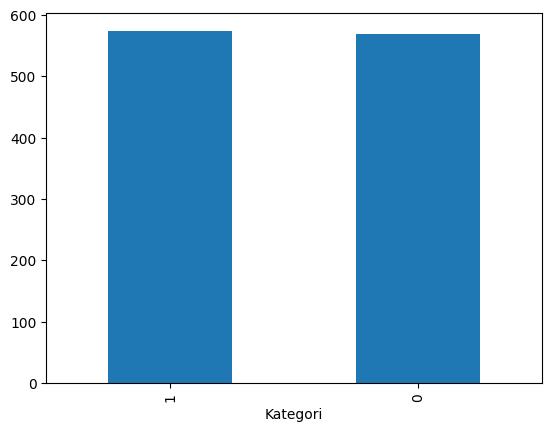

In [20]:
df['Kategori'].value_counts().plot(kind='bar')

### View word cloud

In [21]:
text = " ".join(word for word in df['Pesan_clean'])

Word cloud for ham


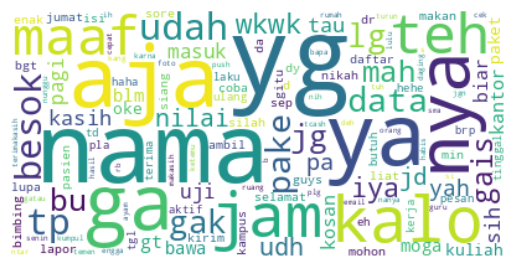

In [23]:
rows = df[df['Kategori'] == 0]
text = " ".join(word for word in rows['Pesan_clean'])
wc = WordCloud(collocations = False, background_color = 'white').generate(text)

print("Word cloud for ham")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Word cloud for spam


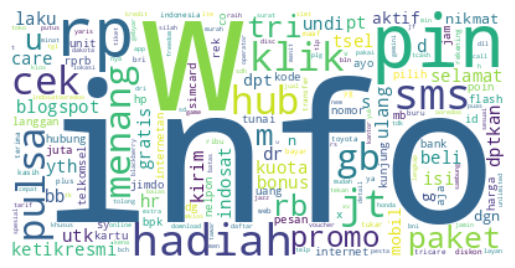

In [24]:
rows = df[df['Kategori'] == 1]
text = " ".join(word for word in rows['Pesan_clean'])
wc = WordCloud(collocations = False, background_color = 'white').generate(text)

print("Word cloud for spam")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [40]:
extra_stopwords = [
    "ya", "aja", "yg", "gak", "ga", "klo", "kalo", "teh", "sih", "tuh",
    "deh", "aku","udah","wkwk", "nya", "nya", "lu", "dah", "gitu", "itu", "sih",
    "kalo", "nggak","gak", "terus", "nah", "lagi", "makanya", "kamu", "gue",
    "karena", "kami", "kita", "saja", "kok", "kan", "bilang", "nah","udh",
    "utk", "dpt", "dr", "jg", "cek", "hub", "pun", "dapat", "hubungi"
]
def remove_extra_stopwords(text, stopwords):
    words = text.split()
    cleaned_words = [word for word in words if word not in stopwords]
    return ' '.join(cleaned_words)

In [41]:
df["Pesan_clean"] = df["Pesan_clean"].apply(lambda x: remove_extra_stopwords(x, extra_stopwords))

Word cloud for ham


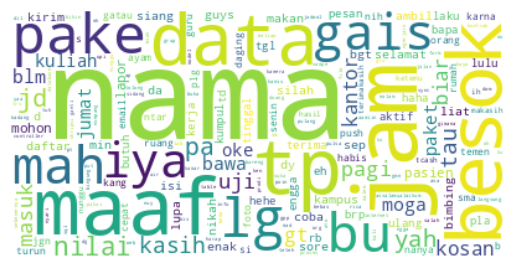

In [42]:
rows = df[df['Kategori'] == 0]
text = " ".join(word for word in rows['Pesan_clean'])
wc = WordCloud(collocations = False, background_color = 'white').generate(text)

print("Word cloud for ham")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Word cloud for spam


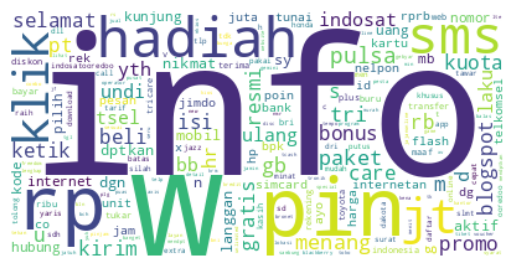

In [43]:
rows = df[df['Kategori'] == 1]
text = " ".join(word for word in rows['Pesan_clean'])
wc = WordCloud(collocations = False, background_color = 'white').generate(text)

print("Word cloud for spam")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# Text Representation

### Install libraries

In [44]:
!pip install scikit-learn

### Import libraries

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

### Train Test Splitting

In [46]:
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)

### Transforming and merging into DataFrame

In [47]:
vectorizer = TfidfVectorizer()

tfidf = vectorizer.fit_transform(df_train["Pesan_clean"])
tfidf_train = pd.DataFrame(tfidf.toarray(),columns=vectorizer.get_feature_names_out())

tfidf = vectorizer.transform(df_test["Pesan_clean"])
tfidf_test = pd.DataFrame(tfidf.toarray(),columns=vectorizer.get_feature_names_out())

In [48]:
tfidf_train['info']

0      0.000000
1      0.000000
2      0.148979
3      0.000000
4      0.000000
         ...   
795    0.000000
796    0.000000
797    0.000000
798    0.000000
799    0.000000
Name: info, Length: 800, dtype: float64

# Text Modeling

## Bert Model

### Install Libraries

In [62]:
!pip install -U tensorflow==2.14 tensorflow-text==2.14 keras==2.14

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 78.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 68.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 70.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 35.7 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 64.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 69.0 MB/s eta 0:00:00
  Attempting uninstall: tf-keras
    Found existing installation: tf_keras 2.15.1
    Uninstalling tf_keras-2.15.1:
      Successfully uninstalled tf_keras-2.15.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflo

### Import Libraries

In [70]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report
from tensorflow import keras
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Input
from keras.losses import BinaryCrossentropy
from keras.metrics import BinaryAccuracy
from keras import regularizers
from transformers import BertTokenizer, TFBertModel

### Import Pre-trained Bert Model

In [82]:
PRE_TRAINED_MODEL_NAME = 'cahya/bert-base-indonesian-522M'
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)
bert_model = TFBertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some layers from the model checkpoint at cahya/bert-base-indonesian-522M were not used when initializing TFBertModel: ['mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at cahya/bert-base-indonesian-522M.
If your task is si

### Encoding Data

In [83]:
input_ids = []
attention_masks = []

for sent in df['Pesan_clean']:
    bert_inps = tokenizer.encode_plus(sent, add_special_tokens = True, max_length = 32, padding = "max_length", return_attention_mask = True, truncation = True)
    input_ids.append(bert_inps['input_ids'])
    attention_masks.append(bert_inps['attention_mask'])

input_ids = np.asarray(input_ids)
attention_masks = np.array(attention_masks)
labels = np.array(df['Kategori'])

### Train Test Spitting

In [84]:
train_inp, test_inp, train_mask, test_mask, train_label, test_label, = train_test_split(input_ids, attention_masks, labels, test_size = 0.3, random_state = 42)

### Creating a Keras Model

In [85]:
max_len = 32

inps = Input(shape = (max_len,), dtype = 'int64')
masks = Input(shape = (max_len,), dtype = 'int64')
indo_bert_layer = bert_model(inps, attention_mask = masks)[0][:, 0, :]
dropout = Dropout(0.5)(indo_bert_layer)
pred = Dense(1, activation = 'sigmoid', kernel_regularizer = regularizers.l2(0.01))(dropout)
model = tf.keras.Model(inputs = [inps, masks], outputs = pred)

### Compiling the Model

In [86]:
losses = BinaryCrossentropy(from_logits = False)
metric = BinaryAccuracy('accuracy')
optimizer = tf.keras.optimizers.AdamW(learning_rate = 5e-5)

model.compile(loss = losses, optimizer = optimizer, metrics = [metric])

### Fitting the Model

In [87]:
history = model.fit([train_inp, train_mask], train_label, batch_size = 64, epochs = 3)

Epoch 1/3


13/13 [==============================] - 270s 19s/step - loss: 0.5746 - accuracy: 0.7987
Epoch 2/3
13/13 [==============================] - 238s 18s/step - loss: 0.1760 - accuracy: 0.9425
Epoch 3/3
13/13 [==============================] - 237s 18s/step - loss: 0.1255 - accuracy: 0.9700


### Evaluate the Model

In [127]:
from sklearn.metrics import classification_report
#training
print("classification report for training data")
y_prediction_raw = model.predict([train_inp, train_mask])
y_prediction = [1 if pred > 0.5 else 0 for pred in y_prediction_raw]

target_names = ['ham', 'spam']
result = classification_report(train_label, y_prediction, target_names = target_names, digits = 4)
print(result)

#testing
print("classification report for testing data")
y_prediction_raw = model.predict([test_inp, test_mask])
y_prediction = [1 if pred > 0.5 else 0 for pred in y_prediction_raw]

target_names = ['ham', 'spam']
result = classification_report(test_label, y_prediction, target_names = target_names, digits = 4)
print(result)

classification report for training data
25/25 [==============================] - 70s 3s/step
              precision    recall  f1-score   support

         ham     0.9975    0.9826    0.9900       403
        spam     0.9826    0.9975    0.9900       397

    accuracy                         0.9900       800
   macro avg     0.9901    0.9901    0.9900       800
weighted avg     0.9901    0.9900    0.9900       800

classification report for testing data
11/11 [==============================] - 30s 3s/step
              precision    recall  f1-score   support

         ham     0.9748    0.9337    0.9538       166
        spam     0.9402    0.9774    0.9584       177

    accuracy                         0.9563       343
   macro avg     0.9575    0.9556    0.9561       343
weighted avg     0.9570    0.9563    0.9562       343



### Single predict using Bert Model

In [128]:
def single_predict_bert(sentence):
  sentence = clean(sentence)
  sentence = remove_extra_stopwords(sentence, extra_stopwords)
  input_dict = tokenizer.encode_plus(sentence, add_special_tokens = True, max_length = 32, padding = "max_length", return_attention_mask = True, truncation = True)
  input_ids = tf.constant(input_dict['input_ids'])[None, :]
  attention_mask = tf.constant(input_dict['attention_mask'])[None, :]

  prediction_raw = model.predict([input_ids, attention_mask], verbose = 0)
  prediction = 1 if prediction_raw > 0.5 else 0
  label_map = {0: 'ham', 1: 'spam'}
  predicted_label = label_map[prediction]

  print(f"Bert Predicted label for'{sentence}' is: {predicted_label}")

In [129]:
single_predict_bert("Aku sayang kamu")
single_predict_bert("Selamat nomor sim card anda memenangkan hadiah motor beat")

Bert Predicted label for'Aku sayang' is: ham
Bert Predicted label for'Selamat nomor sim card anda memenangkan hadiah motor beat' is: spam


## Support Vector Machine

### Import Libraries

In [130]:
from sklearn import svm

### Create SVM Model

In [131]:
clf = svm.SVC(kernel = 'linear', random_state = 42)

### Fitting the Model

In [132]:
clf.fit(tfidf_train, df_train['Kategori'])

SVC(kernel='linear', random_state=42)

### Evaluate the Model

In [141]:
print("classification report for trainning data:")
predictions_SVM = clf.predict(tfidf_train)
label_map = {0: 'ham', 1: 'spam'}
print(classification_report(df_train['Kategori'], predictions_SVM,target_names = target_names, digits = 4))

print("classification report for testing data:")
predictions_SVM = clf.predict(tfidf_test)
label_map = {0: 'ham', 1: 'spam'}
print(classification_report(df_test['Kategori'], predictions_SVM,target_names = target_names, digits = 4))


classification report for trainning data:
              precision    recall  f1-score   support

         ham     1.0000    0.9899    0.9949       398
        spam     0.9901    1.0000    0.9950       402

    accuracy                         0.9950       800
   macro avg     0.9951    0.9950    0.9950       800
weighted avg     0.9950    0.9950    0.9950       800

classification report for testing data:
              precision    recall  f1-score   support

         ham     0.9702    0.9532    0.9617       171
        spam     0.9543    0.9709    0.9625       172

    accuracy                         0.9621       343
   macro avg     0.9623    0.9621    0.9621       343
weighted avg     0.9622    0.9621    0.9621       343



### Single predict using SVM Model

In [142]:
def single_predict_svm(sentence):
  sentence = clean(sentence)
  sentence = remove_extra_stopwords(sentence, extra_stopwords)
  tfidf_input = vectorizer.transform([sentence])
  tfidf_input_df = pd.DataFrame(tfidf_input.toarray(), columns = vectorizer.get_feature_names_out())

  # Make prediction
  predicted_category = clf.predict(tfidf_input_df)[0]  # Assuming clf is trained and available

  # Map predicted label to its corresponding category
  predicted_label = label_map[predicted_category]
  print(f"SVM Predicted label for the sentence '{sentence}' is: {predicted_label}")

In [143]:
single_predict_svm("aku cinta kamu")
single_predict_svm("Selamat nomor sim card anda memenangkan hadiah motor beat")

SVM Predicted label for the sentence 'cinta' is: ham
SVM Predicted label for the sentence 'Selamat nomor sim card anda memenangkan hadiah motor beat' is: spam
